In [2]:
import os
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

### Loading metadata input.

In [3]:
metal_excel_dir = "../data/raw/VSD.xlsx"
metadata = pd.read_excel(metal_excel_dir,sheet_name='read_dataset')

#### Head

In [4]:
metadata.head()

,File_segment_name,Duration,Violence_start,Violence_end,Violence_duration
0,angry_011,117.0,21.0,38.0,17.0
1,angry_011,117.0,40.0,55.0,15.0
2,angry_011,117.0,60.0,79.0,19.0
3,angry_011,117.0,85.0,95.0,10.0
4,angry_011,117.0,101.0,110.0,9.0


#### Tail

In [5]:
metadata.tail()

,File_segment_name,Duration,Violence_start,Violence_end,Violence_duration
336,angry_211,149.0,108.014,121.203,13.189
337,noviolence_01,4939.0,0.000,0.010,0.010
338,noviolence_02,4476.0,0.000,0.010,0.010
339,noviolence_03,4966.0,0.000,0.010,0.010
340,noviolence_04,3731.0,0.000,0.010,0.010


Examine the segmentation of our data to ensure accuracy. Some audio files are labeled with the identifiers yaf_angry_ and noviolence_, indicating the type of segment present in the audio.

In [6]:
# Get unique values in the columns File_segment_name
metadata['File_segment_name'].unique()


array(['angry_011', 'angry_012', 'angry_013', 'angry_014', 'angry_015',
       'angry_016', 'angry_017', 'angry_018', 'angry_021', 'angry_022',
       'angry_023', 'angry_024', 'angry_025', 'angry_026', 'angry_027',
       'angry_028', 'angry_031', 'angry_032', 'angry_033', 'angry_034',
       'angry_035', 'angry_036', 'angry_037', 'angry_038', 'angry_039',
       'angry_041', 'angry_042', 'angry_043', 'angry_044', 'angry_045',
       'angry_046', 'angry_047', 'angry_048', 'angry_049', 'angry_049a',
       'angry_049b', 'angry_051', 'angry_052', 'angry_053', 'angry_054',
       'angry_055', 'angry_056', 'angry_057', 'angry_058', 'angry_059',
       'angry_061', 'angry_062', 'angry_063', 'angry_064', 'angry_065',
       'angry_066', 'angry_067', 'angry_071', 'angry_072', 'angry_073',
       'angry_074', 'angry_075', 'angry_076', 'angry_077', 'angry_081',
       'angry_082', 'angry_083', 'angry_084', 'angry_085', 'angry_086',
       'angry_091', 'angry_092', 'angry_093', 'angry_094', 'an

In [7]:
metadata.shape

(341, 5)

In [8]:
# Creating directory paths to store violence and non-violence data.
violence_dir = "../data/violence_data"
non_violence_dir = "../data/non_violence_data"

In [9]:
def create_directory(directory_path):
    # Check if the directory already exists
    if not os.path.exists(directory_path):
        # Create the directory if it doesn't exist
        os.makedirs(directory_path)
        print(f"Directory '{directory_path}' created successfully.")
    else:
        print(f"Directory '{directory_path}' already exists.")

In [10]:
create_directory(violence_dir)
create_directory(non_violence_dir)


Directory '../data/violence_data' already exists.
Directory '../data/non_violence_data' already exists.


In [11]:
# We have segments of audio in our data, Hence importing pydub to process segments.
from pydub import AudioSegment

# Looping over all the records in metadata input.
for record in metadata.values:
    t1 = 1000 * record[2]
    t2 = 1000 * record[3]
    audio  = AudioSegment.from_wav(os.path.join("../data/raw/audios_VSD/audios_VSD", str(record[0]) + ".wav"))
    violence_segment = audio[t1:t2]
    # Storing the violence audio segment in the corresponding directory.
    violence_segment.export(os.path.join(violence_dir,record[0]+".wav"))
    
print("===== Violent audio segments separated =====")

for record in metadata.values:
    t1 = 1000 * record[2]
    t2 = 1000 * record[3]
    audio  = AudioSegment.from_wav(os.path.join("../data/raw/audios_VSD/audios_VSD", str(record[0]) + ".wav"))
    non_violence_segment = audio[0:t1]
    non_violence_segment.export(os.path.join(non_violence_dir,record[0]+"_non_violence.wav"))

print("===== Non-violent audio segments separated =====")

===== Violent audio segments separated =====
===== Non-violent audio segments separated =====


In [11]:
# Importing Librosa to extract audio features.
import librosa

# Function to extract MFCC (Mel Frequency Cepstral Coefficients) from the audio sample.
def features_extractor(file):
    audio, sample_rate = librosa.load(file) 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    # We do mean of transpose of value to find out scaled feature.
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

In [12]:
# Creating empty list to store the extracted features.
extracted_features=[]

# Loop to process violent data extraction process.
for record in metadata.values:
    file_name = os.path.join(os.path.abspath(violence_dir), record[0] + ".wav")
    # Labelling violent audio as 1.
    final_class_labels = 1 
    try:
        data = features_extractor(file_name)
    except:
        continue
    extracted_features.append([data,final_class_labels])
print("===== Successfully extracted violent audio data =====")

# Loop to process non-violent data extraction process.
for record in metadata.values:
    file_name = os.path.join(os.path.abspath(non_violence_dir),record[0]+"_non_violence.wav")
    # Labelling non-violent audio as 0.
    final_class_labels = 0
    try:
        data = features_extractor(file_name)
    except:
        continue
    extracted_features.append([data,final_class_labels])
print("===== Successfully extracted non-violent audio data =====")

===== Successfully extracted violent audio data =====


[src/libmpg123/parse.c:do_readahead():1099] warning: Cannot read next header, a one-frame stream? Duh...
[src/libmpg123/parse.c:do_readahead():1099] warning: Cannot read next header, a one-frame stream? Duh...
[src/libmpg123/parse.c:do_readahead():1099] warning: Cannot read next header, a one-frame stream? Duh...
[src/libmpg123/parse.c:do_readahead():1099] warning: Cannot read next header, a one-frame stream? Duh...
[src/libmpg123/parse.c:do_readahead():1099] warning: Cannot read next header, a one-frame stream? Duh...
[src/libmpg123/parse.c:do_readahead():1099] warning: Cannot read next header, a one-frame stream? Duh...
[src/libmpg123/parse.c:do_readahead():1099] warning: Cannot read next header, a one-frame stream? Duh...
[src/libmpg123/parse.c:do_readahead():1099] warning: Cannot read next header, a one-frame stream? Duh...
[src/libmpg123/parse.c:do_readahead():1099] warning: Cannot read next header, a one-frame stream? Duh...
[src/libmpg123/parse.c:do_readahead():1099] warning: Ca

===== Successfully extracted non-violent audio data =====


[src/libmpg123/parse.c:do_readahead():1099] warning: Cannot read next header, a one-frame stream? Duh...


In [24]:
# Converting extracted_features to Pandas dataframe.
extracted_features_df = pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.tail()

,feature,class
651,"[-368.19443, 111.970695, -13.860407, 17.634977...",0
652,"[-215.53848, 125.501945, -43.539345, 34.04715,...",0
653,"[-215.53848, 125.501945, -43.539345, 34.04715,...",0
654,"[-215.53848, 125.501945, -43.539345, 34.04715,...",0
655,"[-215.53848, 125.501945, -43.539345, 34.04715,...",0


In [16]:
# Checking Value counts.
extracted_features_df["class"].value_counts()

class
1    341
0    315
Name: count, dtype: int64

In [17]:
# Split the dataset into independent and dependent dataset.
X = np.array(extracted_features_df["feature"].tolist())
y = np.array(extracted_features_df["class"].tolist())

# Train Test Split.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [18]:
print(X_train.shape, X_test.shape)

(590, 40) (66, 40)


In [22]:
# Reshaping to make the datasets compatible with LSTM.
X_train=X_train.reshape(590,1,40)
X_test=X_test.reshape(66,1, 40)
print(X_train.shape, X_test.shape)

(590, 1, 40) (66, 1, 40)


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,SimpleRNN, LSTM
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

# No of classes.
num_labels=y.shape[0]
model=Sequential()
model.add(LSTM(64,input_shape=(1,40)))

### 1st layer.
model.add(Dense(32))
#model.add(Activation('relu'))
#model.add(Dropout(0.5))

### 2nd layer.
#model.add(Dense(128))
#model.add(Activation('relu'))
#model.add(Dropout(0.4))

### 3rd layer.
#model.add(Dense(64))
#model.add(Activation('relu'))
#model.add(Dropout(0.5))

### 4th layer.
#model.add(Dense(32))
#model.add(Activation('relu'))

### 5th layer.
#model.add(Dense(16))
#model.add(Activation('relu'))

### 6th layer.
#model.add(Dense(8))
#model.add(Activation('relu'))

### Final layer.
model.add(Dense(1))
model.add(Activation('sigmoid'))

2024-02-21 21:31:56.629195: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-02-21 21:31:56.630651: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-02-21 21:31:56.631889: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                26880     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 28,993
Trainable params: 28,993
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Model Compilation.
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

In [30]:
# Trianing model.
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 
num_epochs = 10
num_batch_size = 32
checkpointer = ModelCheckpoint(filepath='./audio_classification.hdf5', verbose=1, save_best_only=True)
start = datetime.now()
history = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)
duration = datetime.now() - start
print("Training completed in time:", duration)

Epoch 1/10


2024-02-21 21:33:50.086100: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-02-21 21:33:50.088067: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-02-21 21:33:50.089594: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

19/19 [==============================] - ETA: 0s - loss: 0.6350 - accuracy: 0.6661 

2024-02-21 21:33:51.899158: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-02-21 21:33:51.900519: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-02-21 21:33:51.901789: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus


Epoch 1: val_loss improved from inf to 0.61196, saving model to ./audio_classification.hdf5
19/19 [==============================] - 2s 27ms/step - loss: 0.6350 - accuracy: 0.6661 - val_loss: 0.6120 - val_accuracy: 0.6667
Epoch 2/10
13/19 [===================>..........] - ETA: 0s - loss: 0.5582 - accuracy: 0.7524
Epoch 2: val_loss improved from 0.61196 to 0.52799, saving model to ./audio_classification.hdf5
19/19 [==============================] - 0s 9ms/step - loss: 0.5542 - accuracy: 0.7542 - val_loss: 0.5280 - val_accuracy: 0.7121
Epoch 3/10
17/19 [=========================>....] - ETA: 0s - loss: 0.4941 - accuracy: 0.7757
Epoch 3: val_loss improved from 0.52799 to 0.48873, saving model to ./audio_classification.hdf5
19/19 [==============================] - 0s 6ms/step - loss: 0.4912 - accuracy: 0.7763 - val_loss: 0.4887 - val_accuracy: 0.6970
Epoch 4/10
15/19 [======================>.......] - ETA: 0s - loss: 0.4487 - accuracy: 0.8229
Epoch 4: val_loss improved from 0.48873 to 0.

In [31]:
# Evaluating the model on testing data.
test_accuracy = model.evaluate(X_test,y_test,verbose=0)
print("Test accuracy of the model:", test_accuracy[1])

Test accuracy of the model: 0.8787878751754761


In [32]:
# Evaluating the model on training data.
train_accuracy = model.evaluate(X_train,y_train,verbose=0)
print("Train accuracy of the model:", train_accuracy[1])

Train accuracy of the model: 0.9610169529914856


In [33]:
# Prediction on test data.
predict_x = model.predict(X_test)
print(predict_x)
#classes_x = np.argmax(predict_x,axis=1)
#print(classes_x)

3/3 [==============================] - 1s 2ms/step
[[0.96072316]
 [0.99701667]
 [0.8915494 ]
 [0.04032648]
 [0.09477224]
 [0.92065364]
 [0.37740397]
 [0.99701667]
 [0.05292179]
 [0.84812915]
 [0.96103954]
 [0.99585444]
 [0.08520898]
 [0.04351263]
 [0.6806408 ]
 [0.00780724]
 [0.08981943]
 [0.6806408 ]
 [0.13391721]
 [0.84812915]
 [0.376217  ]
 [0.4187113 ]
 [0.19076678]
 [0.16909899]
 [0.02152638]
 [0.02277793]
 [0.8745252 ]
 [0.02152638]
 [0.27594966]
 [0.9943484 ]
 [0.998653  ]
 [0.9869775 ]
 [0.96103954]
 [0.8567915 ]
 [0.998653  ]
 [0.989003  ]
 [0.16909899]
 [0.28085452]
 [0.9206098 ]
 [0.99585444]
 [0.04032648]
 [0.160387  ]
 [0.90995616]
 [0.84812915]
 [0.37548855]
 [0.043804  ]
 [0.3315987 ]
 [0.5054456 ]
 [0.95860875]
 [0.95479393]
 [0.147632  ]
 [0.85108995]
 [0.00780724]
 [0.92600507]
 [0.95820576]
 [0.47842327]
 [0.9435566 ]
 [0.8594715 ]
 [0.4187113 ]
 [0.13391721]
 [0.99941736]
 [0.9974435 ]
 [0.99941736]
 [0.09453651]
 [0.989003  ]
 [0.13391721]]


2024-02-21 21:34:34.321042: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-02-21 21:34:34.323442: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-02-21 21:34:34.325516: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [36]:
# Saving the model.
model.save("model_LSTM_v2.h5")

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


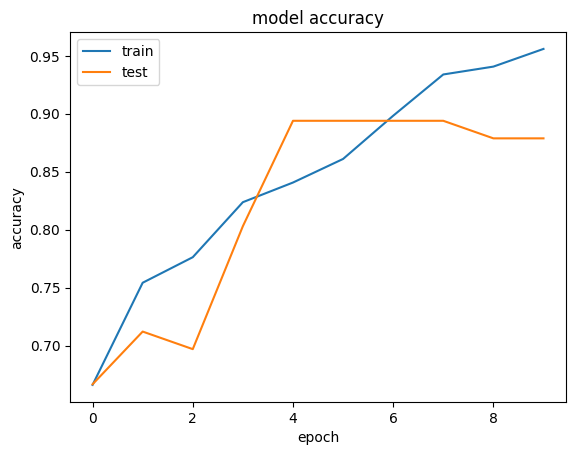

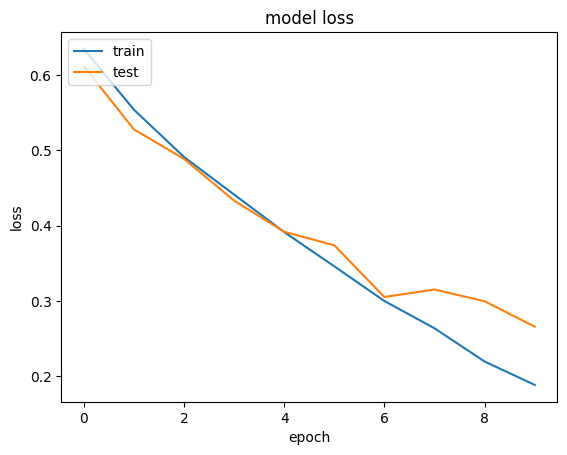

In [37]:
print(history.history.keys())
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()